In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('/Users/alphapro/Desktop/Kodlar, Programlar/ML/SignLang_ML/sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('/Users/alphapro/Desktop/Kodlar, Programlar/ML/SignLang_ML/sign-language-mnist/sign_mnist_test.csv')

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train.shape

(27455, 785)

In [10]:
labels = train['label'].values

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# Data exploration

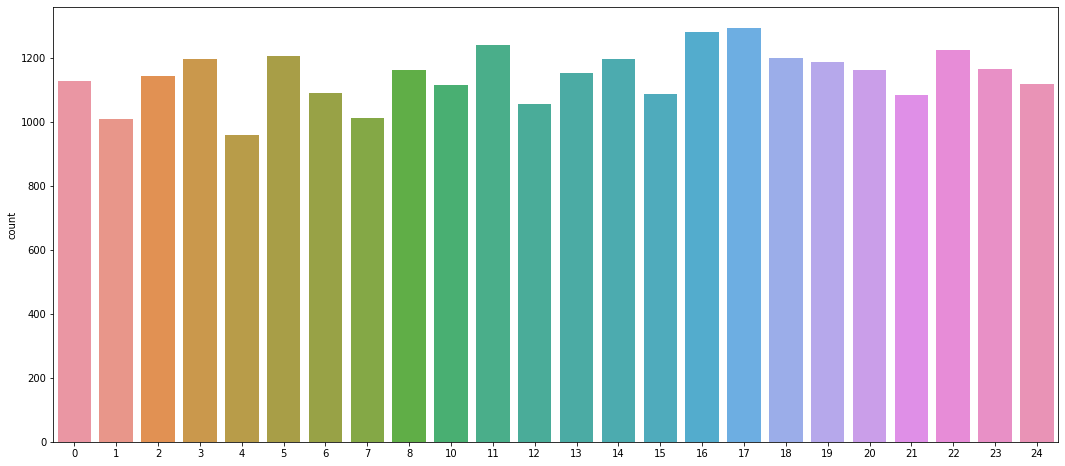

In [12]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [13]:
train.drop('label', axis = 1, inplace = True)

In [14]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [16]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

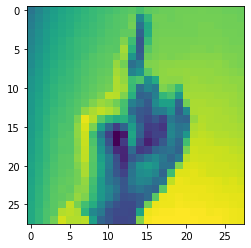

In [17]:
plt.imshow(images[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [29]:
batch_size = 128
num_classes = 24
epochs = 30

Normalizing the training and test data

In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [24]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

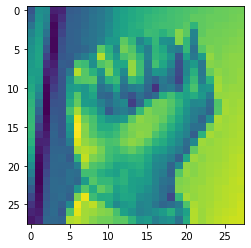

In [25]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [27]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/30
19218/19218 [==============================] - 7s 371us/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 2/30
19218/19218 [==============================] - 7s 369us/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 3/30
19218/19218 [==============================] - 7s 372us/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 4/30
19218/19218 [==============================] - 7s 375us/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 5/30
19218/19218 [==============================] - 7s 377us/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 6/30
19218/19218 [==============================] - 7s 379us/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 7/30
19218/19218 [==============================] - 7s 37

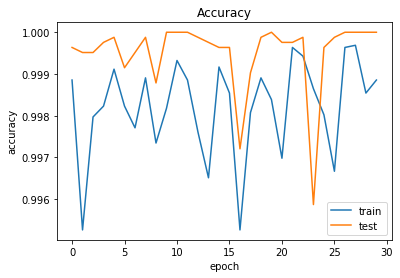

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [43]:
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.20))

model2.add(Dense(24, activation = 'softmax'))

In [44]:
model2.compile(loss = "categorical_crossentropy", optimizer = "adam",
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [45]:
model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/30
19218/19218 [==============================] - 8s 391us/step - loss: 2.5824 - accuracy: 0.2095 - val_loss: 1.5334 - val_accuracy: 0.5245
Epoch 2/30
19218/19218 [==============================] - 8s 397us/step - loss: 1.1962 - accuracy: 0.5965 - val_loss: 0.7348 - val_accuracy: 0.7664
Epoch 3/30
19218/19218 [==============================] - 7s 380us/step - loss: 0.7258 - accuracy: 0.7501 - val_loss: 0.4465 - val_accuracy: 0.8601
Epoch 4/30
19218/19218 [==============================] - 8s 392us/step - loss: 0.4749 - accuracy: 0.8399 - val_loss: 0.2913 - val_accuracy: 0.9173
Epoch 5/30
19218/19218 [==============================] - 8s 391us/step - loss: 0.3190 - accuracy: 0.8962 - val_loss: 0.2038 - val_accuracy: 0.9422
Epoch 6/30
19218/19218 [==============================] - 8s 391us/step - loss: 0.2154 - accuracy: 0.9312 - val_loss: 0.1109 - val_accuracy: 0.9727
Epoch 7/30
19218/19218 [==============================] - 7s 37

In [34]:
test_labels = test['label']

In [35]:
test.drop('label', axis = 1, inplace = True)

In [36]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [37]:
test_labels = label_binrizer.fit_transform(test_labels)

In [38]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [39]:
test_images.shape

(7172, 28, 28, 1)

In [40]:
y_pred = model.predict(test_images)

In [46]:
y_pred2 = model2.predict(test_images)

In [41]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(test_labels, y_pred2.round())

0.8392359174567764

In [42]:
accuracy_score(test_labels, y_pred.round())

0.8563859453430006

In [48]:
model.save('/Users/alphapro/Desktop/Kodlar, Programlar/ML/SignLang_ML/sign_model') 